# Ejemplo de uso del módulo `toolbox_ML` con Titanic

Este notebook demuestra el uso del módulo `toolbox_ML.py` para:

- Resumir un DataFrame (`describe_df`)
- Tipificar variables automáticamente (`tipifica_variables`)
- Seleccionar features relevantes para un problema de **regresión**
- Visualizar relaciones entre variables y la variable objetivo

 Dataset: Titanic  
 Variable objetivo (regresión): `fare`


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Configuración estética de gráficos
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

# Importar funciones del toolbox

from toolbox_ML import *


## 1) Carga del dataset

Se carga el dataset Titanic desde `./data/titanic.csv`.



In [4]:
df = pd.read_csv("./data/titanic.csv")
df.head()


,sex,age,sibsp,parch,fare,class,who,adult_male,embark_town,alive,alone
0,male,22.0,1,0,7.2500,Third,man,True,Southampton,no,False
1,female,38.0,1,0,71.2833,First,woman,False,Cherbourg,yes,False
2,female,26.0,0,0,7.9250,Third,woman,False,Southampton,yes,True
3,female,35.0,1,0,53.1000,First,woman,False,Southampton,yes,False
4,male,35.0,0,0,8.0500,Third,man,True,Southampton,no,True


## 2) Estructura del dataset

Revisamos tipos de datos, número de filas y columnas.


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sex          891 non-null    object 
 1   age          891 non-null    float64
 2   sibsp        891 non-null    int64  
 3   parch        891 non-null    int64  
 4   fare         891 non-null    float64
 5   class        891 non-null    object 
 6   who          891 non-null    object 
 7   adult_male   891 non-null    bool   
 8   embark_town  891 non-null    object 
 9   alive        891 non-null    object 
 10  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(2), object(5)
memory usage: 64.5+ KB


## 3) Resumen descriptivo (`describe_df`)

Se obtiene un resumen por variable con:
- Tipo de dato  
- Porcentaje de nulos  
- Valores únicos  
- Porcentaje de cardinalidad


In [6]:
describe_df(df)


,sex,age,sibsp,parch,fare,class,who,adult_male,embark_town,alive,alone
DATA_TYPE,object,float64,int64,int64,float64,object,object,bool,object,object,bool
MISSING(%),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
UNIQUE_VALUES,2,89,7,7,248,3,3,2,3,2,2
CARDIN (%),0.224467,9.988777,0.785634,0.785634,27.833895,0.3367,0.3367,0.224467,0.3367,0.224467,0.224467


## 4) Tipificación automática (`tipifica_variables`)

Se sugiere el tipo de variable según:
- cardinalidad
- porcentaje de cardinalidad

Parámetros:
- `umbral_categoria=10`
- `umbral_continua=0.2`


In [7]:
tipos = tipifica_variables(df, umbral_categoria=10, umbral_continua=0.2)
tipos


,nombre_variable,tipo_sugerido
0,sex,Binaria
1,age,Numerica Continua
2,sibsp,Categórica
3,parch,Categórica
4,fare,Numerica Continua
5,class,Categórica
6,who,Categórica
7,adult_male,Binaria
8,embark_town,Categórica
9,alive,Binaria


## 5) Selección de variables numéricas (`get_features_num_regression`)

Se seleccionan variables numéricas con correlación relevante respecto al target `fare`.

Criterios:
- Correlación Pearson: `abs(corr) >= 0.2`
- Significación estadística: `p-value <= 0.05`


In [8]:
num_features = get_features_num_regression(
    df,
    target_col="fare",
    umbral_corr=0.2,
    pvalue=0.05
)

num_features


['parch']

#### Resultado de selección numérica

La función `get_features_num_regression()` devolvió `['parch']` porque fue la única variable numérica que cumple:

- `abs(corr) ≥ 0.2` (correlación de Pearson con `fare`)
- `p-value ≤ 0.05` (significación estadística)

Esto indica que `parch` presenta una relación lineal suficientemente relevante con el precio del billete (`fare`) en este dataset.


## 6) Visualización numérica (`plot_features_num_regression`)

Se visualiza la relación entre `fare` y las variables numéricas seleccionadas mediante pairplots.


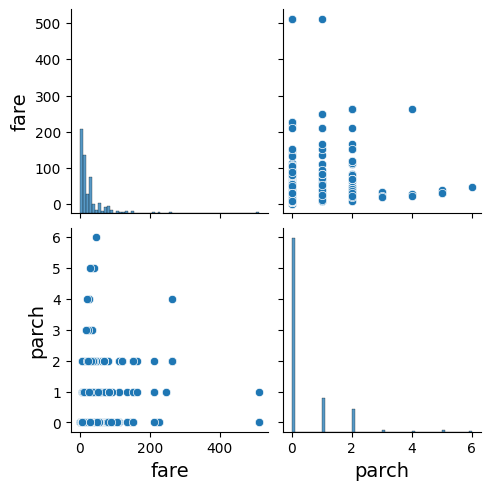

['parch']

In [9]:
plot_features_num_regression(
    df,
    target_col="fare",
    columns=num_features,
    umbral_corr=0.2,
    pvalue=0.05
)


### Interpretación del pairplot (fare vs parch)

- En la diagonal se observa que `fare` tiene una distribución asimétrica a la derecha: la mayoría de billetes son baratos y existen algunos valores extremos altos (outliers).
- `parch` es una variable discreta y la mayor parte de pasajeros tiene `parch = 0`.
- En el scatterplot se aprecia una tendencia positiva moderada: para valores mayores de `parch` aparecen más casos con `fare` elevado, aunque con bastante dispersión.

Esto respalda el resultado de selección numérica, donde `parch` fue la única variable que superó el umbral de correlación y significación estadística.


## 7) Selección de variables categóricas (`get_features_cat_regression`)

Se seleccionan variables categóricas relacionadas significativamente con `fare` usando:

- ANOVA si hay pocas categorías
- Kruskal-Wallis si hay muchas categorías

Nivel de significación: `pvalue=0.05`


In [11]:
cat_features = get_features_cat_regression(
    df,
    target_col="fare",
    pvalue=0.05
)

cat_features


['sex', 'class', 'who', 'adult_male', 'embark_town', 'alive', 'alone']

## 8) Visualización categórica (`plot_features_cat_regression`)

Se representa la distribución de `fare` por cada variable categórica seleccionada.

Se activa `with_individual_plot=True` para generar un gráfico por variable.


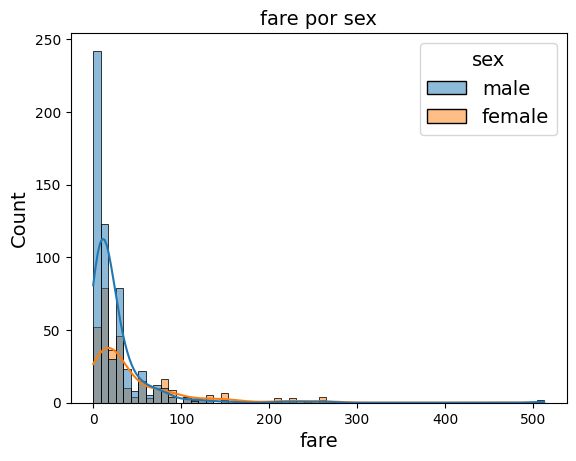

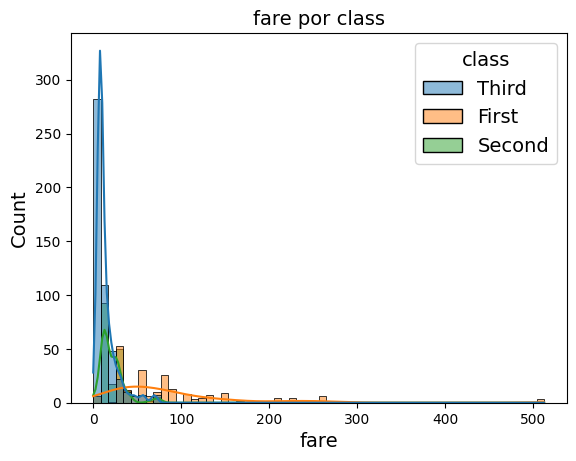

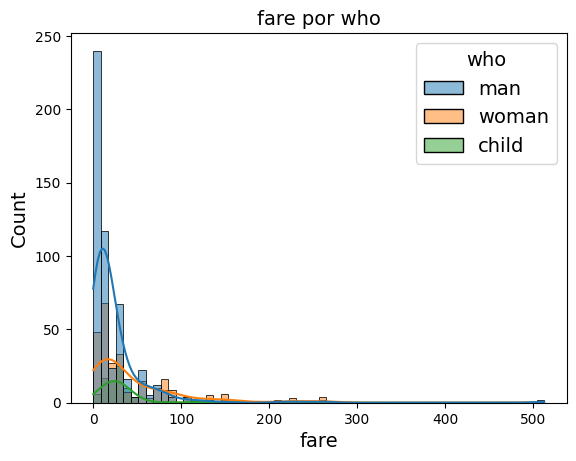

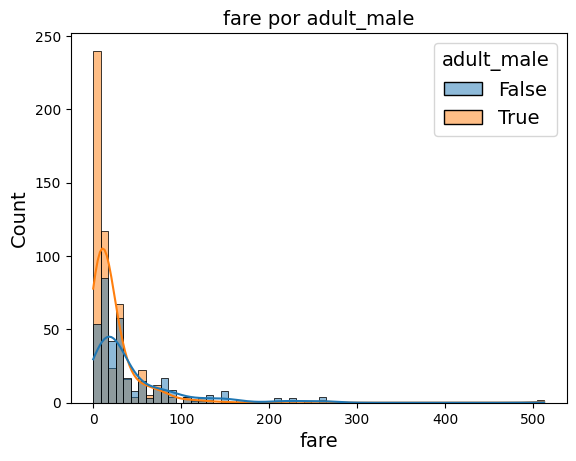

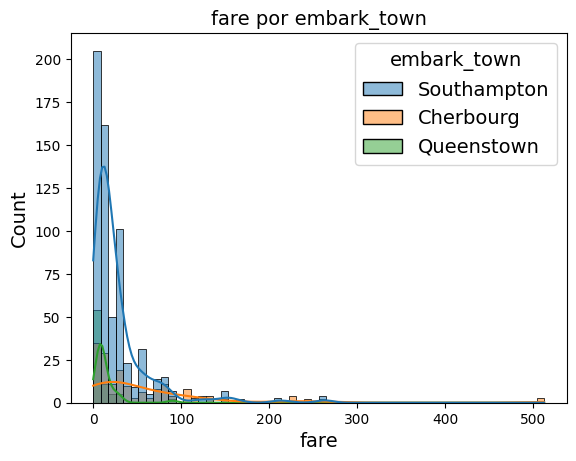

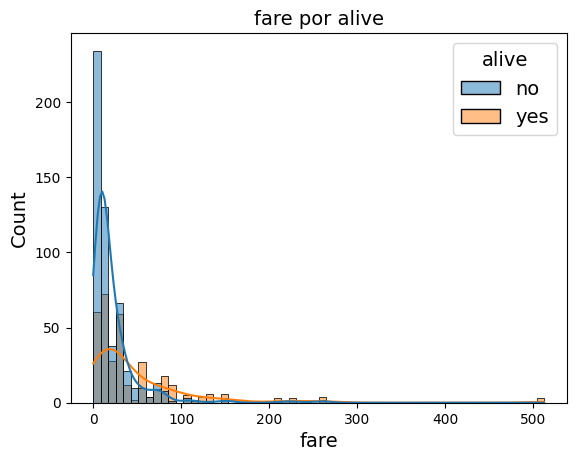

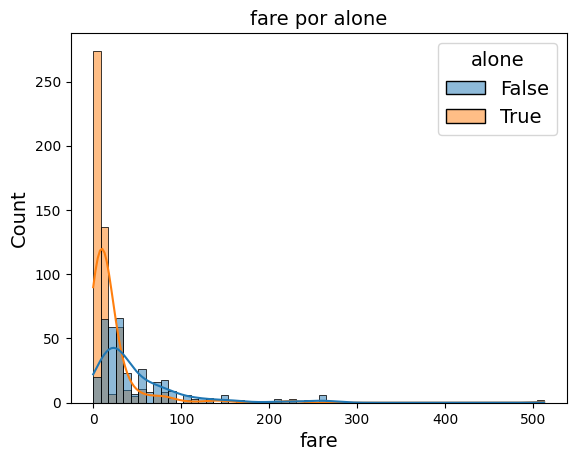

['sex', 'class', 'who', 'adult_male', 'embark_town', 'alive', 'alone']

In [12]:
plot_features_cat_regression(
    df,
    target_col="fare",
    columns=cat_features,
    pvalue=0.05,
    with_individual_plot=True
)


## Conclusión

En este ejercicio se desarrolló un módulo reutilizable (`toolbox_ML.py`) orientado a acelerar el análisis exploratorio y la selección inicial de variables en problemas de **regresión**.

Se eligió **`fare` como variable objetivo** porque es una variable **numérica continua** (precio del billete), cumpliendo con el requisito del enunciado para un target de regresión y permitiendo aplicar correctamente correlación de Pearson y tests estadísticos para selección de features.

Aplicando el toolbox al dataset Titanic se obtuvo:

- Un resumen estructurado del dataset (tipos, nulos, cardinalidad) mediante `describe_df`.
- Una tipificación automática de variables según cardinalidad con `tipifica_variables`.
- Selección de features numéricas relevantes: `['parch']`, al ser la única que cumple simultáneamente el umbral de correlación y significación estadística.
- Selección de features categóricas relevantes: `['sex', 'class', 'who', 'adult_male', 'embark_town', 'alive', 'alone']`, ya que presentan diferencias significativas en la distribución de `fare` entre categorías.

Finalmente, las funciones de visualización (`plot_features_num_regression` y `plot_features_cat_regression`) permitieron confirmar gráficamente estas relaciones, proporcionando un flujo completo y reproducible que facilita la toma de decisiones antes de entrenar modelos.
